# SP via class imbalance

Example [test scores](https://www.brookings.edu/blog/social-mobility-memos/2015/07/29/when-average-isnt-good-enough-simpsons-paradox-in-education-and-earnings/)

SImpson's paradox can also occur due to a class imbalance, where for example, over time the value of several differnt subgroups all increase, but the totla average decreases over tme.   This is also am mportant tpe to catch because this can inicate a large class disparity beased on the subgrouping variable.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sp_data_util import sp_plot

In [2]:
t = np.linspace(0,50,11)
count_rate = np.asarray([1,1.5,1.4])
count_pow = np.asarray([1,1.4, 1.3])
count_0 = np.asarray([100,60,40])
count = np.asarray([count_0 + count_rate*(t_i**count_pow) for t_i in t])
share = count/np.asarray([np.sum(count, axis=1)]*3).T
score_rate = np.asarray([.1, .112, .15])
score_0 = [310,290,280]
scores_group = np.asarray([score_0 + score_rate*t_i for t_i in t])
total_score = np.sum(scores_group*share,axis=1)


In [3]:
total_score

array([298.        , 297.45443985, 296.68317666, 296.10797527,
       295.75884352, 295.60140953, 295.59491821, 295.70503918,
       295.90526496, 296.17565064, 296.50124668])

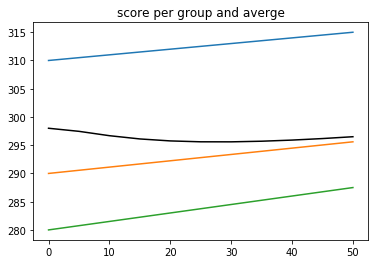

In [4]:
plt.plot(t,scores_group)
plt.plot(t,total_score,'k', label ='average')
plt.title('score per group and averge');

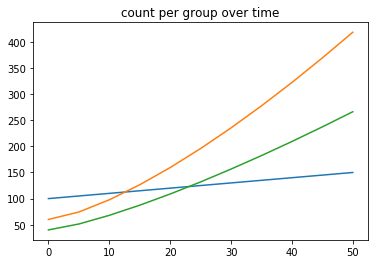

In [5]:
plt.plot(t,count)
plt.title('count per group over time');

We can change the numbers a bit to see tht it still works. 

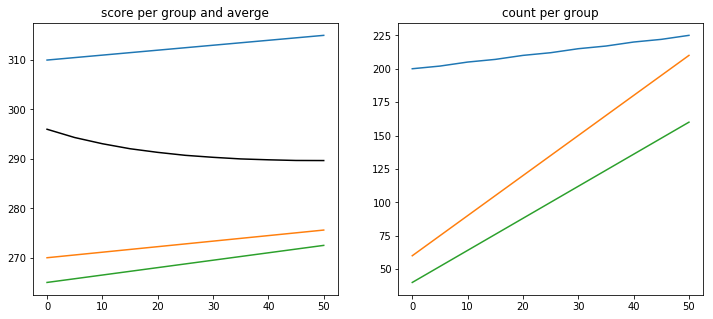

In [6]:
t = np.linspace(0,50,11)
count_rate = np.asarray([.5,3,2.4])
count_pow = np.asarray([1,1,1]) #1.24, 1.13])
group_names = ['W','B','H']
count_0 = np.asarray([200,60,40])
count = np.asarray([np.floor(count_0 + count_rate*(t_i**count_pow)) for t_i in t])
share = count/np.asarray([np.sum(count, axis=1)]*3).T
score_rate = np.asarray([.1, .112, .15])
score_0 = [310,270,265]
scores_group = np.asarray([score_0 + score_rate*t_i for t_i in t])
total_score = np.sum(scores_group*share,axis=1)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(t,scores_group)
plt.plot(t,total_score,'k', label ='average')
plt.title('score per group and averge');

plt.subplot(1,2,2)
plt.plot(t,count)
plt.title('count per group');

In [7]:
count

array([[200.,  60.,  40.],
       [202.,  75.,  52.],
       [205.,  90.,  64.],
       [207., 105.,  76.],
       [210., 120.,  88.],
       [212., 135., 100.],
       [215., 150., 112.],
       [217., 165., 124.],
       [220., 180., 136.],
       [222., 195., 148.],
       [225., 210., 160.]])

# Generalizing this 

instead of setting a growth rate and being completely computational, we can set the start and end and then add noise in the middle

In [37]:
N_t = 11
t = np.linspace(0,50,N_t)
group_names = ['W','B','H']


count_0 = np.asarray([200,60,40])
count_0

share_0 = count_0/np.asarray([np.sum(count_0)]*3).T
score_0 = np.asarray([310,270,265])
score_growth = [1.1,1.3,1.4]
total_0 = np.sum(share_0*score_0)
total_0

295.99999999999994

In [40]:
# set this final value
score_t = (score_0*score_growth*N_t).T
total_t = .85*total_0
count_t = total_t*np.linalg.pinv(score_t)


count = np.linspace(count_0,count_t,N_t)
share = count/np.asarray([np.sum(count, axis=1)]*3).T
scores_group = np.asarray([score_0 + score_rate*t_i for t_i in t])
total_score = np.sum(scores_group*share,axis=1)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(t,scores_group)
plt.plot(t,total_score,'k', label ='average')
plt.title('score per group and averge');

plt.subplot(1,2,2)
plt.plot(t,count)
plt.title('count per group');

LinAlgError: 1-dimensional array given. Array must be at least two-dimensional

The above is occuring in aggregate data, we should generate and aim to detect from the individual measurements. So we can expand the above generator.  We'll use the group score and counts to draw the indivdual rows of our table. 

In [8]:
dat = [[t_t,np.random.normal(loc=sg,scale=10),g ]
            for sg_t, c_t,t_t in zip(scores_group,count,t) 
           for sg,c,g in zip(sg_t,c_t,group_names) 
           for i in range(int(c))]

In [9]:
len(dat)

4920

In [10]:
df = pd.DataFrame(data=dat,columns = ['year','score','race'])

In [11]:
df.head()

,year,score,race
0,0.0,313.953726,W
1,0.0,322.010357,W
2,0.0,295.437061,W
3,0.0,325.478651,W
4,0.0,321.274494,W


In [12]:
df.groupby(['race','year']).mean().unstack()

score                                                              \
year        0.0         5.0         10.0        15.0        20.0        25.0   
race                                                                           
B     269.485214  270.447258  271.345493  271.789364  272.170719  271.883347   
H     265.584818  267.681618  264.510167  266.780537  267.922336  266.547303   
W     308.323131  311.132340  311.487422  311.001611  311.930033  312.039548   

                                                                  
year        30.0        35.0        40.0        45.0        50.0  
race                                                              
B     272.306841  273.189621  275.756229  274.136003  274.927023  
H     269.189586  270.287175  272.230988  271.569917  273.009788  
W     312.400500  313.472374  313.579169  314.132084  314.987406

In [13]:
df.groupby(['year']).mean().T

year,0.0,5.0,10.0,15.0,20.0,25.0,30.0,35.0,40.0,45.0,50.0
score,294.857106,294.990034,293.049211,291.728189,291.251097,289.7346,289.646472,289.753759,290.386106,289.179099,289.560348


The overall goes down while each of the groupwise means goes up, as expected.  

In [14]:
df.groupby('race').corr()

score      year
race                          
B    score  1.000000  0.151040
     year   0.151040  1.000000
H    score  1.000000  0.242364
     year   0.242364  1.000000
W    score  1.000000  0.161544
     year   0.161544  1.000000

In [15]:
df.corr()

,year,score
year,1.000000,-0.071902
score,-0.071902,1.000000


We can see this in the correlation matrices as well, so our existing detector will work, but it has an intuitively different generating mechanism.

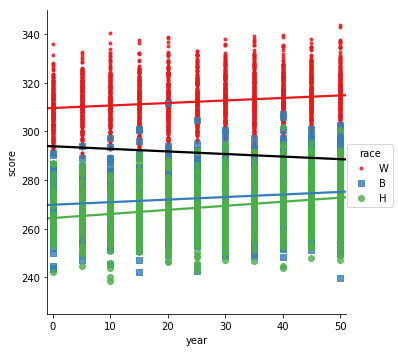

In [16]:
sp_plot(df,'year','score','race',domain_range=[-1, 51, 225, 350])

Vizually, the scatter plots for this are also somewhat different, the groups are not as separable as they were in the regression-based examples we worked with initially.  